In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
home = pd.read_csv('train_home.csv')
home.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(home.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The dataset has 81 columns and 1460 rows. Some of the columns has null values

- Number of missing values in each columns

In [4]:
missing_col_count = home.isnull().sum()
print(missing_col_count[missing_col_count > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


- Some of the columns has a large number of null values,it is better to drop these columns as filling them will affect our analysis

- Some have a reasonable numbers of null values which can be filled for our analysis

In [5]:
columns_to_drop = ['Alley','FireplaceQu','PoolQC','MiscFeature','Fence']
home = home.dropna(axis=1)

In [6]:
print(home.describe())

                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411  ...   
std      30.202904     20.645407   456.098091   161.319273   441.866955  ..

- Looking at the "Sale Price" column which is the target column, the highest price is 755000 and the lowest is 34900.

The average price is 180921.195890

In [7]:
print(home.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')


- Separating the categorical columns from the numerical columns

In [8]:
cat_var = home.loc[:,home.dtypes == np.object]
print(cat_var.head())

  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... ExterCond Foundation Heating  \
0      CollgCr       Norm       Norm  ...        TA      PConc    GasA   
1      Veenker      Feedr       Norm  ...        TA     CBlock    GasA   
2      CollgCr       Norm       Norm  ...        TA      PConc    GasA   
3      Crawfor       Norm       Norm  ...        TA     BrkTil    GasA   
4      NoRidge       Norm       Norm  ...        TA      PConc    GasA   

  HeatingQC CentralAir KitchenQual Functional PavedDrive SaleType  \
0        Ex          Y          Gd        Typ        

In [9]:
num_var = home.loc[:,home.dtypes != np.object]
num_var.drop(['Id','SalePrice'],axis=1,inplace=True)
print(num_var)

      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


- Visualizing some of the numerical columns.

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


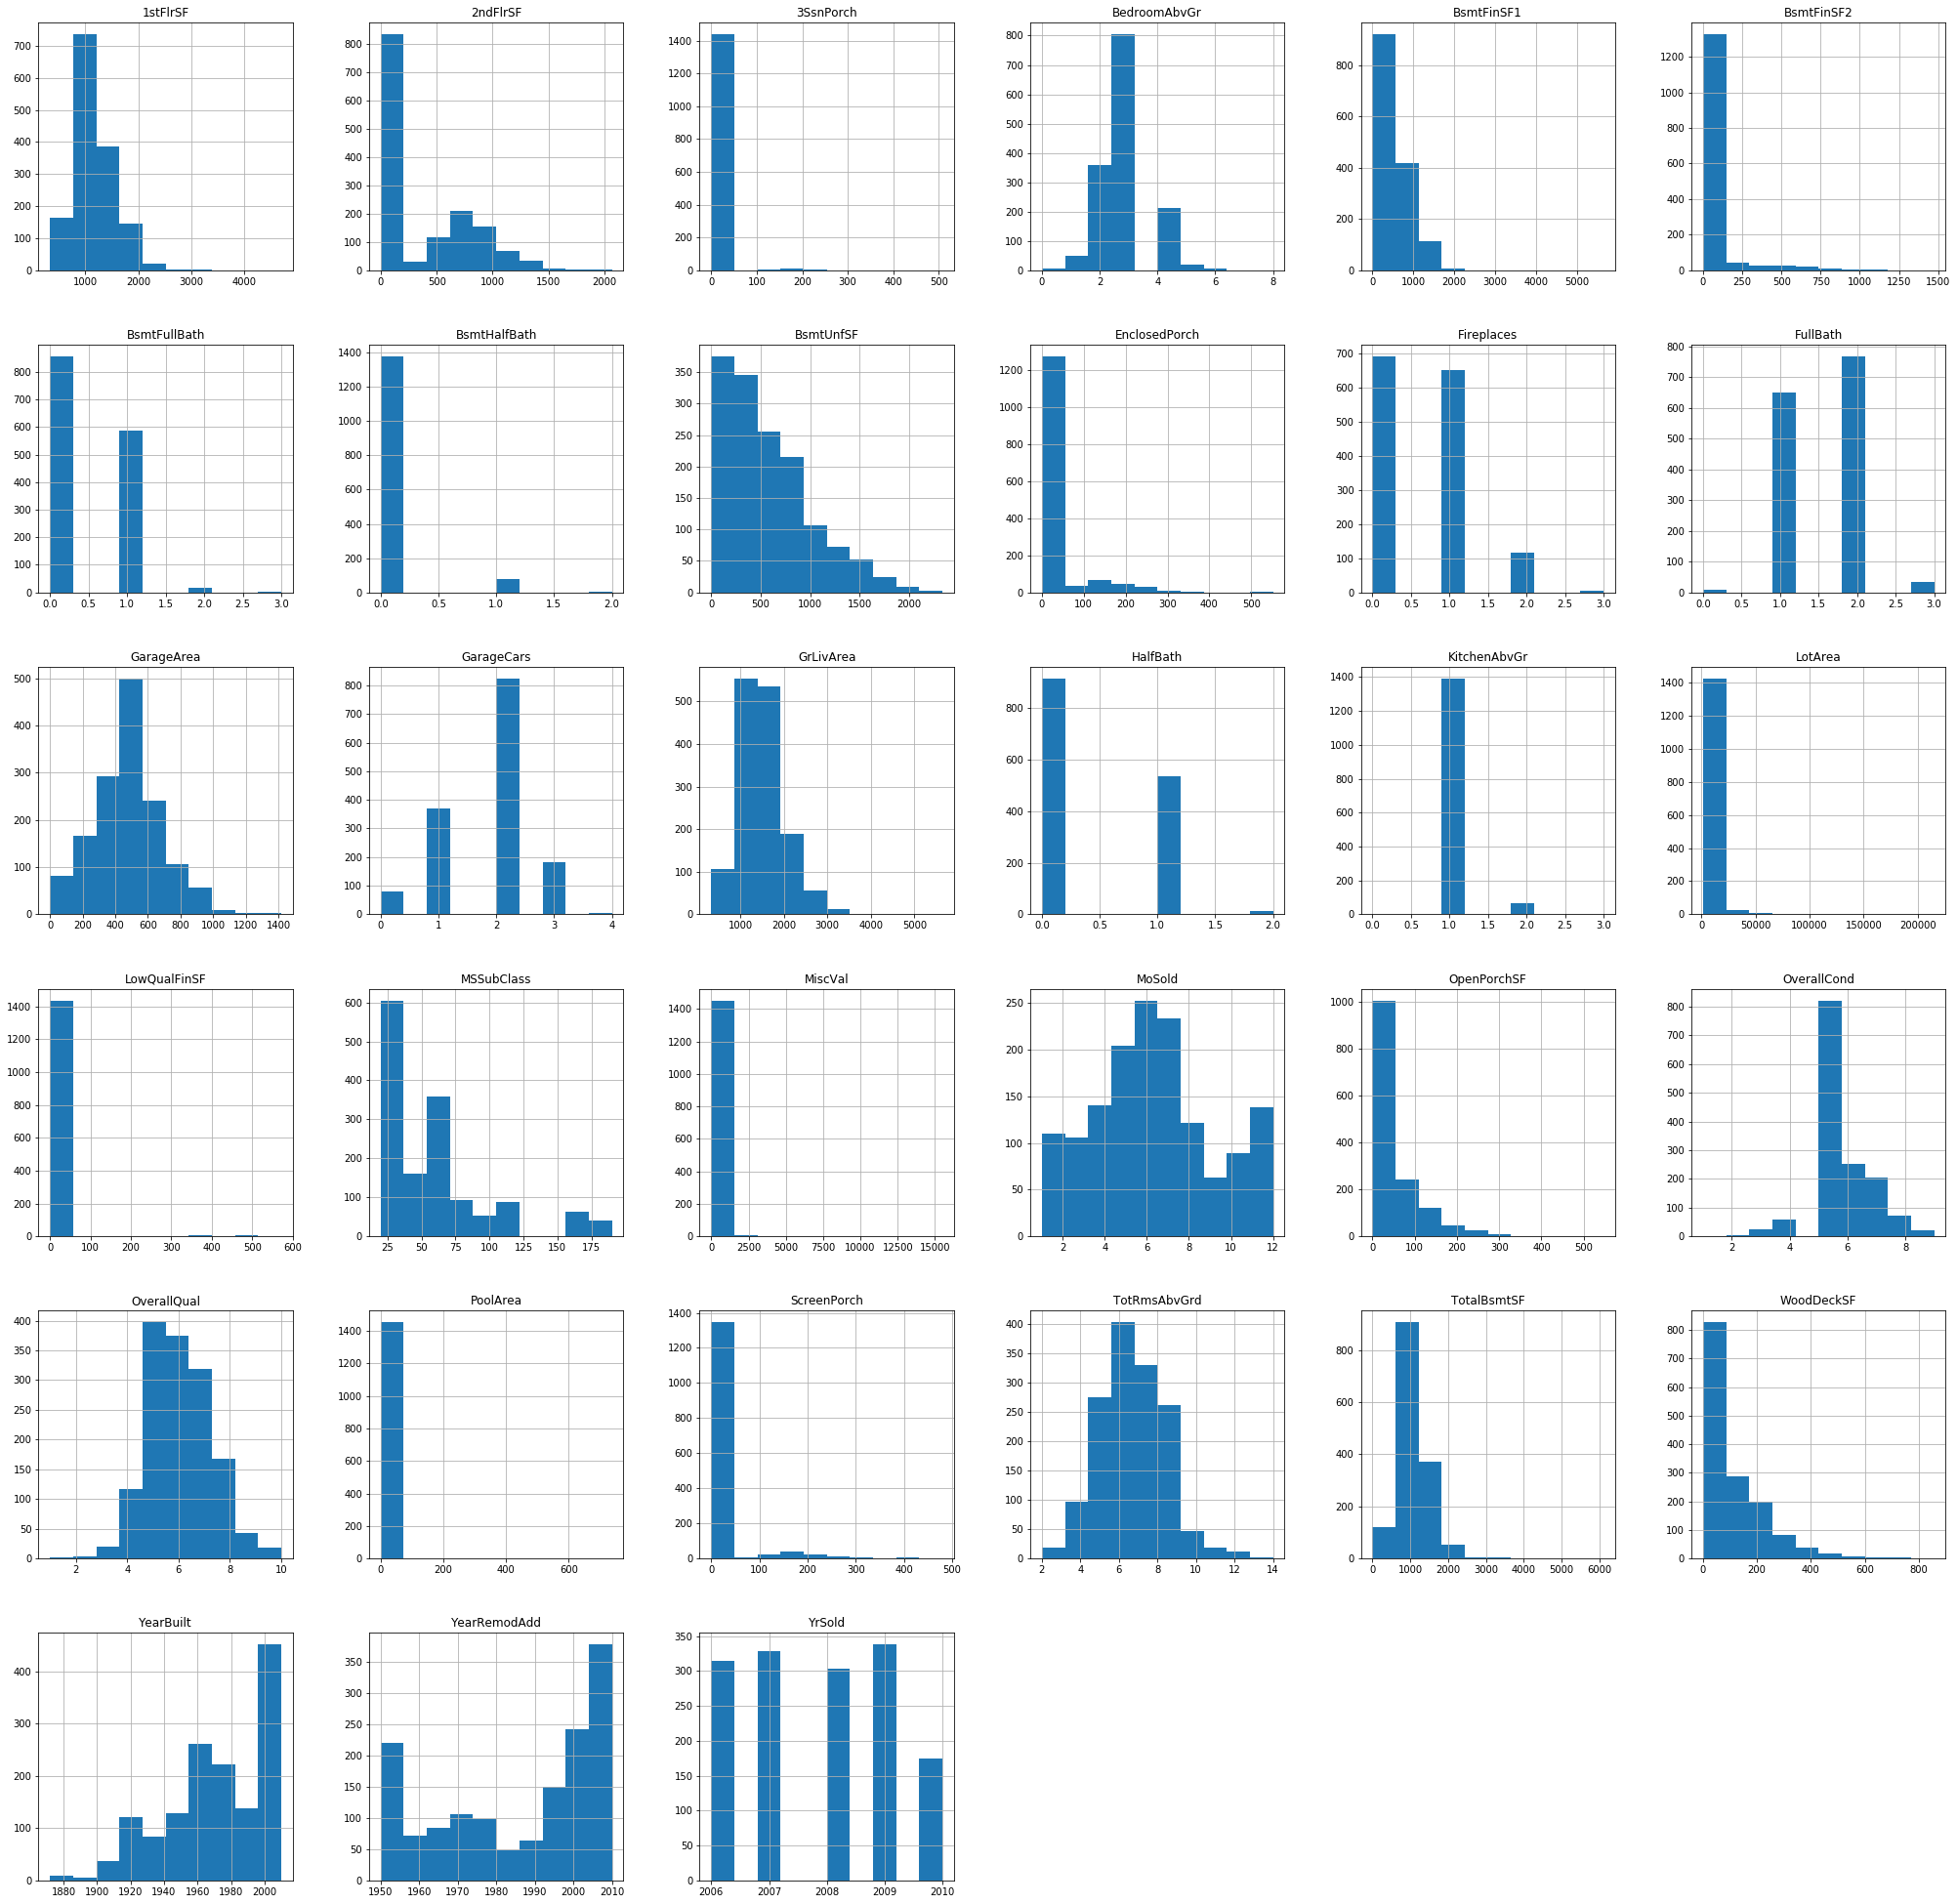

In [10]:
fig = plt.figure(figsize=(35,35))
ax1 = fig.gca()
cols_1 = num_var
cols_1.hist(ax=ax1)
plt.show()

###### ENCODING THE CATEGORICAL VARIABLE

- Using Label encoder for the categorical variable

In [11]:
cat_var = cat_var.astype(str)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded = cat_var.apply(label_encoder.fit_transform)
print(encoded.head())

   MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  ExterCond  Foundation  Heating  \
0             5           2           2  ...          4           2        1   
1            24           1           2  ...          4           1        1   
2             5           2           2  ...          4           2        1   
3             6           2           2  ...          4           0        1   
4            15           2           2  ...          4           2        1   

   HeatingQC  CentralAir  KitchenQual  Funct

- Joining the encoded categorical variable with numerical variable

In [12]:
home_data = num_var.join(encoded)
print(home_data.head())
home_data_cols = home_data.columns

   MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  ExterCond  Foundation  \
0         706           0        150          856  ...          4           2   
1         978           0        284         1262  ...          4           1   
2         486           0        434          920  ...          4           2   
3         216           0        540          756  ...          4           0   
4         655           0        490         1145  ...          4           2   

   Heating  HeatingQC  CentralAir  KitchenQual  Fu

In [13]:
x = home_data
Y = home['SalePrice']
X = x.copy()
y = Y.copy()
print(y.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [14]:
print(X.replace([np.inf,-np.inf],np.nan,inplace=True))

None


###### Splitting the dataset into training and testing data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


- Using Univariate Feature Selection
- Selecting the best 40 columns

In [16]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif,k=40)
X_train_new = selector.fit_transform(X_train,y_train)
X_test_new = selector.fit_transform(X_test,y_test)
print(X_train_new[0:5])

[[ 6000     5     8  1925  1997     0   884   884   884   464  1348     1
      0     3     5     1     1   216     0     0     0     0     0     0
   2009     4     3     3     3     0     1     1    13     3     0     1
      0     1     3     4]
 [14536     8     5  2002  2003  1300   316  1616  1629     0  1629     2
      0     3     9     1     3   808     0   252     0     0     0     0
   2007     3     3     3    23     2     3     1    12     2     2     1
      0     1     2     4]
 [14684     7     7  1990  1991   485  1496  2158  2196     0  2196     2
      0     3     7     1     3   701    84    70     0     0     0     0
   2009     3     0     3    20     2     3     1     6     2     1     1
      2     1     2     4]
 [ 9560     5     7  1972  1972   360   504   864   864     0   864     1
      0     3     5     0     1   288     0     0     0     0     0     0
   2006     3     0     3     5     2     3     1     8     3     1     1
      0     1     3     4]
 [ 6

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [37] are constant.
  UserWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


- Getting back the selected features and make other features to be zero

In [17]:
selected_X_train = pd.DataFrame(selector.inverse_transform(X_train_new),index =X_train.index,columns=home_data_cols)
selected_X_test = pd.DataFrame(selector.inverse_transform(X_test_new),index = X_test.index,columns=home_data_cols)
print(selected_X_train.head())

      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1202           0     6000            5            0          8          1925   
947            0    14536            8            0          5          2002   
1205           0    14684            7            0          7          1990   
1339           0     9560            5            0          7          1972   
729            0     6240            4            0          5          1925   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  ExterCond  \
1202        1997           0          0            0  ...          3   
947         2003           0          0         1300  ...          2   
1205        1991           0          0          485  ...          2   
1339        1972           0          0          360  ...          3   
729         1950           0          0          152  ...          3   

      Foundation  Heating  HeatingQC  CentralAir  KitchenQual  Functional  \
1202     

- Drop the the columns with values zero

In [18]:
X_train_cols = selected_X_train.columns[selected_X_train.var()!=0]
X_test_cols = selected_X_test.columns[selected_X_test.var()!=0]
XX_train = X_train[X_train_cols]
XX_test = X_test[X_test_cols]
print(XX_train.dropna().head())
print()
print(XX_test.head())

      LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  \
1202     6000            5       1925          1997           0          884   
947     14536            8       2002          2003        1300         1616   
1205    14684            7       1990          1991         485         2158   
1339     9560            5       1972          1972         360          864   
729      6240            4       1925          1950         152          780   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  RoofMatl  Exterior2nd  \
1202       884       464       1348             1  ...         1           14   
947       1629         0       1629             1  ...         1           13   
1205      2196         0       2196             0  ...         1            6   
1339       864         0        864             0  ...         1            8   
729        848         0       1208             0  ...         1            8   

      ExterQual  ExterCond  Foun

In [19]:
from sklearn import preprocessing
XX_train = preprocessing.StandardScaler().fit(XX_train).transform(XX_train)
XX_test = preprocessing.StandardScaler().fit(XX_test).transform(XX_test)
print(XX_train[0:5])

[[-0.44402365 -0.81422725 -1.53872223  0.56420634 -1.00553664 -0.37469151
  -0.72982169  0.23040799 -0.339651    1.11397103 -0.25245241 -1.02970557
  -0.78869325  0.15941569 -0.96375548  0.63251937 -1.07476636 -1.23444326
  -0.77020057  2.99933885 -0.08271621 -0.52400418  1.5072064   0.05425922
   0.73893998 -0.23343247 -1.57260015 -0.02496103 -0.41167451 -0.50283984
  -0.12797034  1.0473912   0.66464331  0.35169125 -1.91870164 -0.13240736
  -0.87687832  0.27323663  0.79876307  0.3291636 ]
 [ 0.39441395  1.36225118  0.99906977  0.8555997   1.96507641  1.38249541
   1.30410498 -0.8259713   0.21245802  1.11397103 -0.25245241  0.79414035
  -0.78869325  0.15941569  1.51724729  0.63251937  1.65420561  1.57286605
  -0.77020057 -0.35220399 -0.08271621  1.72770824 -0.02245094  0.05425922
   0.73893998 -0.23343247  1.80492923 -0.02496103 -0.41167451  1.87084293
  -0.12797034  0.76614217 -0.7417034   0.35169125  0.83926331 -0.13240736
  -0.87687832  0.27323663 -0.38433237  0.3291636 ]
 [ 0.40895

### TRAINING AND PREDICTION

###### PREDICTING USING LINEAR REGRESSION

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
XX_train = np.asanyarray(XX_train)
XX_test = np.asanyarray(XX_test)
y_train = np.asanyarray(y_train)
y_test = np.asanyarray(y_test)


In [21]:
regr.fit(XX_train,y_train)
print('Coeficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coeficients:  [ 5669.31786752 19027.85862068  6427.25116589  2527.63970637
  9855.49924864  6129.2658438  11310.12345844 12525.91568341
  7570.45920807   489.14916388  -358.97131492   443.70454705
   922.09102365 -5833.77242664  6480.32338133  3002.91635978
  3194.18518302  4463.03548724  1749.52426227  -734.24897971
   -49.05729479  -442.94920505  1123.43495105  2179.30741382
 -1374.93508768   410.19131601  1986.90254293 -3070.35549393
 -5262.38210824  2860.5952213    264.28232096  -274.08311292
 -7599.8407663   -718.92250771  -185.19518956  -353.92755172
 -1270.83056064   881.05235518 -8900.71738738   248.59839902]
Intercept:  182358.80039138944


In [22]:
from sklearn.metrics import r2_score
pred = regr.predict(XX_test)
print('Mean absolute error: ',np.mean(np.absolute(pred - y_test)))
print('Residual sum of square: ',np.mean((pred - y_test)**2))
print('R2-score: ',r2_score(pred,y_test))

Mean absolute error:  20940.088530592646
Residual sum of square:  1555851886.9655294
R2-score:  0.7161938607356149


###### USING RANDOM FOREST REGRESSOR MODEL

In [23]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(XX_train,y_train)
prediction = forest_model.predict(XX_test)



In [24]:
from sklearn import metrics
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,prediction))
print()
print('Mean squared error: ',metrics.mean_squared_error(y_test,prediction))
print()
print("Root mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean absolute error:  17656.15694063927

Mean squared error:  838664842.3310384

Root mean squared error:  28959.710674159684


In [25]:
print('R-2 score: ',r2_score(prediction,y_test))

R-2 score:  0.8329968996699121


##### CONCLUSION

- Two different Algorithms were used in which the Random forest regression perform better with a r2 score of 83.3% while the linear regression model has a r2 score of 71.6%.

- The random forest regression can be used to predict the price of a new house with and accuracy of 83.3%.